In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import sys
import os

This dataset is from Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019. This dataset consists several key parameter of graduate admission. Dataset 2 is collected from https://github.com/deedy/gradcafe_data/blob/master/college_agg_phd.csv.  Dataset 2 contains 130 different universities with specific undergraduate GPA, and GRE score. By Visualizing two dataset, it is clear that standariezd score are highly related to acceptance rate, and dataset 2 shows the accpetance rate for univeristies which has more than 3000 applicants.

In [3]:
df = pd.read_csv("Admission_Predict_1.csv")
df.head()


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

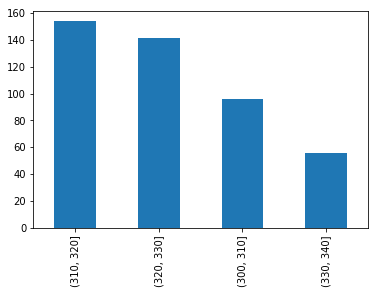

In [4]:
bins = [300,310,320,330,340]
a = pd.cut(df["GRE Score"], bins = bins)
a.value_counts().plot(kind = "bar")

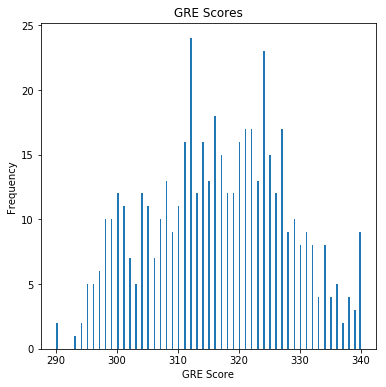

In [5]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

In [6]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From here we can see there is no missing slot from the dataset

In [8]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

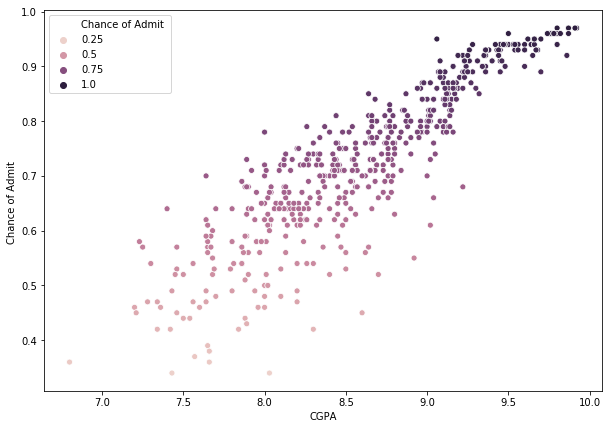

In [9]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['CGPA'],df['Chance of Admit '],hue=df['Chance of Admit '])


From here we can see the higher the undergraduate GPA, the higher chance the acceptance chance will be

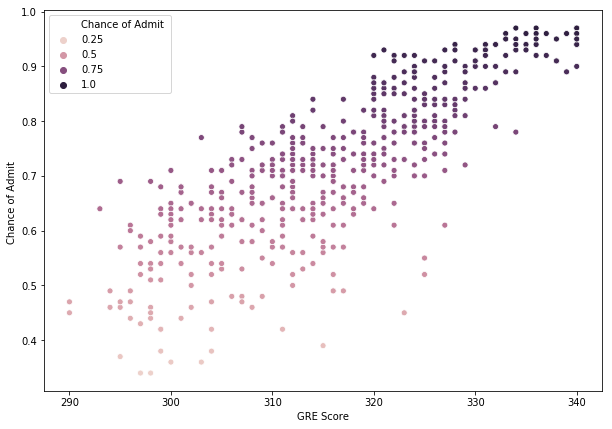

In [10]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['GRE Score'],df['Chance of Admit '],hue=df['Chance of Admit '])

From the visuliza graph, we can see that the higher the GRE score is the higher the Admission chance will be. However, there are several data point that diverges from the main trend, but the overall trends indicated the Correlations between GRE score and admission chance 

Overall trends indicates that the higher the TOFEL score the higher chance will be. However, comnpared to GRE and undergradute GPA, TOFEL is obviously less related with chance of admission. More data visualizations required to find out more detailed realationship betweem TOFEL and admission chance 

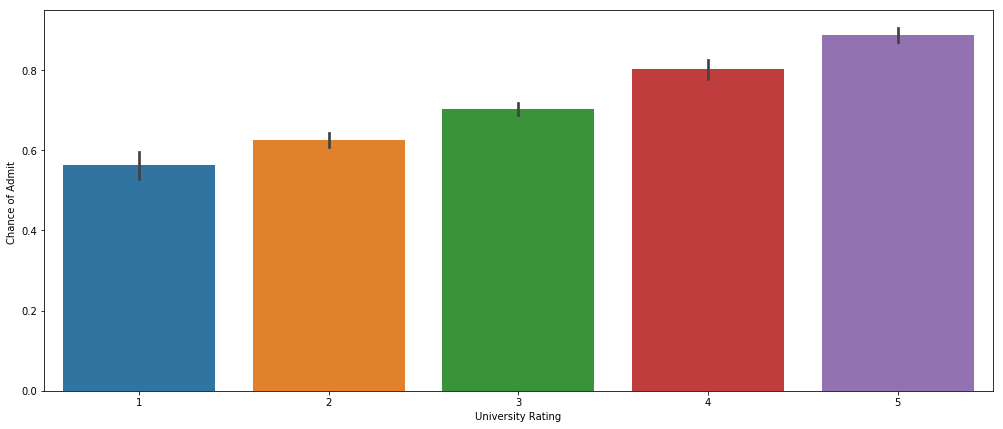

In [11]:
plt.figure(figsize=(17,7))
sns.barplot(df['University Rating'],df['Chance of Admit '])

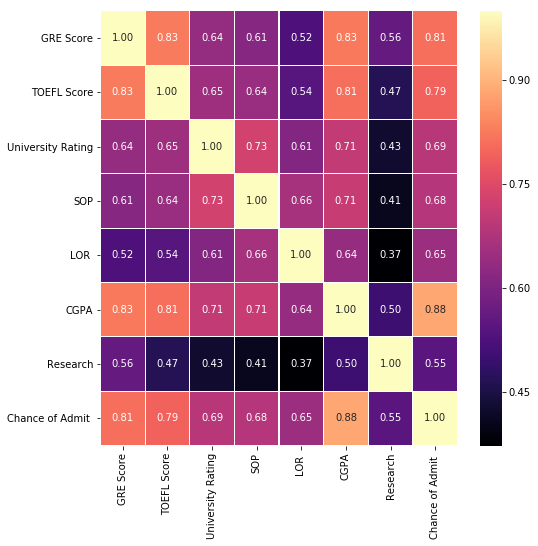

In [12]:
fig,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

From this heat map, it is clearly that the chance of admit is highly related to GRE, TOFEL and Undergraduate GPA, and UGPA is the most influential factor among all parameter

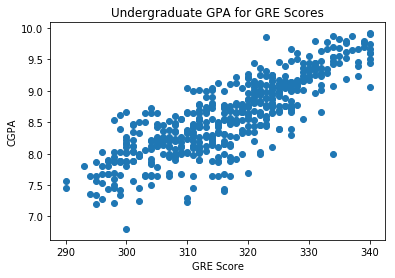

In [13]:
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("Undergraduate GPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

From this plot, it is obvious that students who got higher GRE score also had higher undergraduate GPA

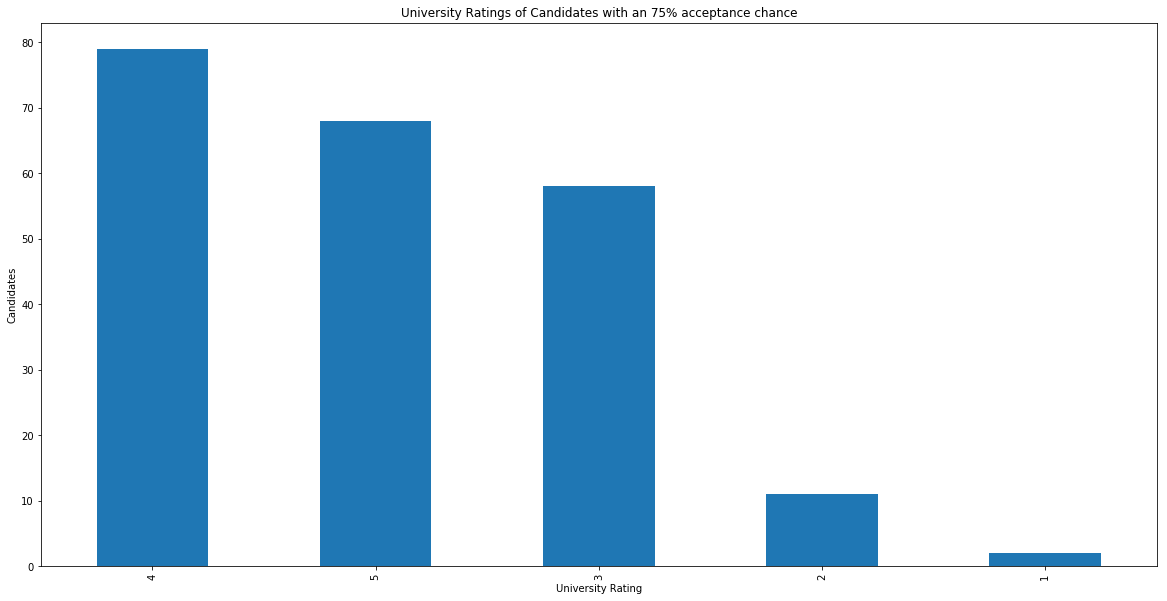

In [14]:
s = df[df["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()


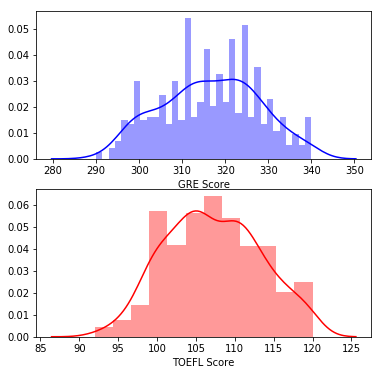

In [15]:
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(df['GRE Score'],bins=34,color='blue')
plt.subplot(2, 1, 2)
sns.distplot(df['TOEFL Score'],bins=12,color='red')

From this two plots, we can see that most applicants tend to achieve 310 and above for GRE, and 100 and above for TOFEL

In [16]:
toppers=df[(df['GRE Score']>=320) & (df['TOEFL Score']>=110) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit '],ascending=False)
toppers

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
202        340          120                  5  4.5   4.5  9.91         1   
24         336          119                  5  4.0   3.5  9.80         1   
203        334          120                  5  4.0   5.0  9.87         1   
143        340          120                  4  4.5   4.0  9.92         1   
385        335          117                  5  5.0   5.0  9.82         1   
384        340          113                  4  5.0   5.0  9.74         1   
71         336          112                  5  5.0   5.0  9.76         1   
81         340          120                  4  5.0   5.0  9.50         1   
130        339          114                  5  4.0   4.5  9.76         1   
148        339          116                  4  4.0   3.5  9.80         1   
496        337          117                  5  5.0   5.0  9.87         1   
213        333          119                  5  5.0   4.5  9.78         1   
212        338          120                  4  5.0   5.0  9.66         1   
372        336          119                  4  4.5   4.0  9.62         1   
399        333          117                  4  5.0   4.0  9.66         1   
23         334          119                  5  5.0   4.5  9.70         1   
423        334          119                  5  4.5   5.0  9.54         1   
284        340          112                  4  5.0   4.5  9.66         1   
25         340          120                  5  4.5   4.5  9.60         1   
22         328          116                  5  5.0   5.0  9.50         1   
120        335          117                  5  5.0   5.0  9.56         1   
70         332          118                  5  5.0   5.0  9.64         1   
34         331          112                  5  4.0   5.0  9.80         1   
193        336          118                  5  4.5   5.0  9.53         1   
446        327          118                  4  5.0   5.0  9.67         1   
452        328          116                  4  5.0   3.5  9.60         1   
497        330          120                  5  4.5   5.0  9.56         1   
361        334          116                  4  4.0   3.5  9.54         1   
253        335          115                  4  4.5   4.5  9.68         1   
425        323          111                  5  4.0   5.0  9.86         1   
0          337          118                  4  4.5   4.5  9.65         1   
33         340          114                  5  4.0   4.0  9.60         1   
47         339          119                  5  4.5   4.0  9.70         0   

     Chance of Admit   
202              0.97  
24               0.97  
203              0.97  
143              0.97  
385              0.96  
384              0.96  
71               0.96  
81               0.96  
130              0.96  
148              0.96  
496              0.96  
213              0.96  
212              0.95  
372              0.95  
399              0.95  
23               0.95  
423              0.94  
284              0.94  
25               0.94  
22               0.94  
120              0.94  
70               0.94  
34               0.94  
193              0.94  
446              0.93  
452              0.93  
497              0.93  
361              0.93  
253              0.93  
425              0.92  
0                0.92  
33               0.90  
47               0.89

In [17]:
toppers=df[(df['GRE Score']>=320) & (df['TOEFL Score']>=110) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit '],ascending=False)
toppers

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
202        340          120                  5  4.5   4.5  9.91         1   
24         336          119                  5  4.0   3.5  9.80         1   
203        334          120                  5  4.0   5.0  9.87         1   
143        340          120                  4  4.5   4.0  9.92         1   
385        335          117                  5  5.0   5.0  9.82         1   
384        340          113                  4  5.0   5.0  9.74         1   
71         336          112                  5  5.0   5.0  9.76         1   
81         340          120                  4  5.0   5.0  9.50         1   
130        339          114                  5  4.0   4.5  9.76         1   
148        339          116                  4  4.0   3.5  9.80         1   
496        337          117                  5  5.0   5.0  9.87         1   
213        333          119                  5  5.0   4.5  9.78         1   
212        338          120                  4  5.0   5.0  9.66         1   
372        336          119                  4  4.5   4.0  9.62         1   
399        333          117                  4  5.0   4.0  9.66         1   
23         334          119                  5  5.0   4.5  9.70         1   
423        334          119                  5  4.5   5.0  9.54         1   
284        340          112                  4  5.0   4.5  9.66         1   
25         340          120                  5  4.5   4.5  9.60         1   
22         328          116                  5  5.0   5.0  9.50         1   
120        335          117                  5  5.0   5.0  9.56         1   
70         332          118                  5  5.0   5.0  9.64         1   
34         331          112                  5  4.0   5.0  9.80         1   
193        336          118                  5  4.5   5.0  9.53         1   
446        327          118                  4  5.0   5.0  9.67         1   
452        328          116                  4  5.0   3.5  9.60         1   
497        330          120                  5  4.5   5.0  9.56         1   
361        334          116                  4  4.0   3.5  9.54         1   
253        335          115                  4  4.5   4.5  9.68         1   
425        323          111                  5  4.0   5.0  9.86         1   
0          337          118                  4  4.5   4.5  9.65         1   
33         340          114                  5  4.0   4.0  9.60         1   
47         339          119                  5  4.5   4.0  9.70         0   

     Chance of Admit   
202              0.97  
24               0.97  
203              0.97  
143              0.97  
385              0.96  
384              0.96  
71               0.96  
81               0.96  
130              0.96  
148              0.96  
496              0.96  
213              0.96  
212              0.95  
372              0.95  
399              0.95  
23               0.95  
423              0.94  
284              0.94  
25               0.94  
22               0.94  
120              0.94  
70               0.94  
34               0.94  
193              0.94  
446              0.93  
452              0.93  
497              0.93  
361              0.93  
253              0.93  
425              0.92  
0                0.92  
33               0.90  
47               0.89

I take out the applicants who got higher than 320 in GRE, and higher than 110 in TOFEL, and all selected applicants have more than 89% chance to be admitted, and this proved that the higher the standardized score the higher chance of admission.

Above plots indicate the distribution for all parameter for this dataset.

Here is the second data which contained 130 univeristies with the more detialed distribution on standrized score 

From this two plots, we can see that most applicants tend to achieve 310 and above for GRE, and 100 and above for TOFEL

In [45]:
df2 = pd.read_csv("Dataset2.1.csv")


In [46]:
df2.head(10)

University Name  Number Of Reportees  \
0                           Stanford University                 6666   
1      University Of California, Berkeley (UCB)                 5875   
2                           Columbia University                 5605   
3     University Of Michigan, Ann Arbor (UMich)                 5595   
4                            Cornell University                 5550   
5  University Of California, Los Angeles (UCLA)                 5000   
6              University Of Chicago (UChicago)                 4787   
7            University Of Pennsylvania (UPenn)                 4704   
8        University Of Washington, Seattle (UW)                 4644   
9                            Harvard University                 4431   

   Number Of Acceptances And Rejections Reported  Acceptance Rate  \
0                                           5860         0.240785   
1                                           5272         0.274848   
2                                           4480         0.292857   
3                                           4509         0.353737   
4                                           4669         0.332619   
5                                           4229         0.428707   
6                                           3981         0.306456   
7                                           3722         0.278076   
8                                           3871         0.372514   
9                                           3771         0.285070   

   Number Reporting GRE and GPA  Undergraduate GPA (25 percentile)  \
0                          1002                             3.8000   
1                           692                             3.8000   
2                           631                             3.7200   
3                           826                             3.6825   
4                           772                             3.7050   
5                           666                             3.6400   
6                           627                             3.7300   
7                           523                             3.7000   
8                           855                             3.6650   
9                           406                             3.7175   

   Undergraduate GPA 50 percentile)  Undergraduate GPA (75 percentile)  \
0                             3.900                             3.9850   
1                             3.900                             3.9600   
2                             3.850                             3.9300   
3                             3.830                             3.9400   
4                             3.870                             3.9500   
5                             3.800                             3.9200   
6                             3.865                             3.9600   
7                             3.860                             3.9500   
8                             3.810                             3.9400   
9                             3.850                             3.9525   

   GRE Verbal (25th Percentile)  GRE Verbal (50th Percentile)  \
0                        159.00                         164.0   
1                        160.00                         164.0   
2                        159.00                         164.0   
3                        158.00                         162.0   
4                        157.50                         163.0   
5                        157.00                         162.0   
6                        161.00                         165.0   
7                        159.00                         163.0   
8                        158.00                         163.0   
9                        162.75                         166.0   

   GRE Verbal (75th Percentile)  GRE Quant (25th Percentile)  \
0                        168.00                       164.00   
1                        168.00                  

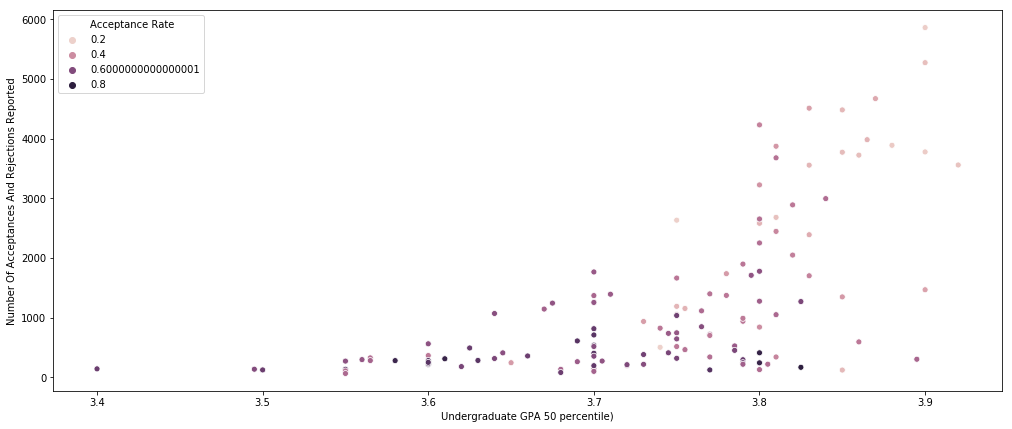

In [21]:
plt.figure(figsize=(17,7))
sns.scatterplot(df2['Undergraduate GPA 50 percentile)'],df2['Number Of Acceptances And Rejections Reported'],hue=df2['Acceptance Rate'])

From this scatter plot we can see that the higher the number of applicants the higher undergraduate GPA will be, and such results indicates that universities which has high applicants are generally more competitive and has higher median UGPA 

In [22]:
toppers=df2[(df2['Undergraduate GPA 50 percentile)']>=3.7) & (df2['GRE Verbal (50th Percentile)']>=160) & (df2['GRE Quant (50th Percentile)']>=160) & (df2['Number Of Acceptances And Rejections Reported']>=2000)].sort_values(by=['Acceptance Rate'],ascending=True)
toppers

University Name  Number Of Reportees  \
23                                 Brown University                 3080   
0                               Stanford University                 6666   
10                                  Yale University                 4351   
12                             Princeton University                 4298   
14      Massachusetts Institute Of Technology (MIT)                 4140   
21                                  Duke University                 3352   
1          University Of California, Berkeley (UCB)                 5875   
7                University Of Pennsylvania (UPenn)                 4704   
9                                Harvard University                 4431   
2                               Columbia University                 5605   
11                          Northwestern University                 4305   
6                  University Of Chicago (UChicago)                 4787   
19                        New York University (NYU)                 3464   
24                 Carnegie Mellon University (CMU)                 2916   
4                                Cornell University                 5550   
3         University Of Michigan, Ann Arbor (UMich)                 5595   
8            University Of Washington, Seattle (UW)                 4644   
15       University Of California, San Diego (UCSD)                 3830   
22  University Of North Carolina, Chapel Hill (UNC)                 3102   
5      University Of California, Los Angeles (UCLA)                 5000   
17                           Boston University (BU)                 3493   
27   University Of California, Santa Barbara (UCSB)                 2389   
16          University Of Texas, Austin (UT Austin)                 3580   
13                 University Of Wisconsin, Madison                 4286   
20       University Of Maryland, College Park (UMD)                 3455   
25       University Of Minnesota, Twin Cities (UMN)                 2901   
18  University Of Illinois, Urbana-Champaign (UIUC)                 3464   

    Number Of Acceptances And Rejections Reported  Acceptance Rate  \
23                                           2632         0.234422   
0                                            5860         0.240785   
10                                           3776         0.246557   
12                                           3887         0.251865   
14                                           3557         0.267641   
21                                           2679         0.273983   
1                                            5272         0.274848   
7                                            3722         0.278076   
9                                            3771         0.285070   
2                                            4480         0.292857   
11                                           3554         0.298255   
6                                            3981         0.306456   
19                                           2580         0.306589   
24                                           2388         0.322864   
4                                            4669         0.332619   
3                                            4509         0.353737   
8                                            3871         0.372514   
15                                           3223         0.384114   
22                                           2444         0.418576   
5                                            4229         0.428707   
17                                           2587         0.431001   
27                                           2047         0.434294   
16                                           2888         0.457064   
13                                           3677         0.474844   
20                                           2652         0.479638   
25                                           2250         0.484889   
18               

Here are universities which has more than 2000 applicants, and the data is arranged from lower accpetance rate to higher acceptance rate. Therefore, it is obvious that the lower the accpetance is the higher other parameter such as GRE score and GPA are higher.

In [23]:
df3 = df2.drop(["Number Of Reportees","Number Of Acceptances And Rejections Reported","Number Reporting GRE and GPA","Undergraduate GPA (25 percentile)","Undergraduate GPA (75 percentile)","GRE Verbal (25th Percentile)","GRE Verbal (75th Percentile)","GRE Quant (25th Percentile)","GRE Quant (75th Percentile)"],axis=1)

In [24]:
df3['GRE Score'] = df3['GRE Verbal (50th Percentile)']+df3['GRE Quant (50th Percentile)']

In [25]:
df3

University Name  Acceptance Rate  \
0                                Stanford University         0.240785   
1           University Of California, Berkeley (UCB)         0.274848   
2                                Columbia University         0.292857   
3          University Of Michigan, Ann Arbor (UMich)         0.353737   
4                                 Cornell University         0.332619   
5       University Of California, Los Angeles (UCLA)         0.428707   
6                   University Of Chicago (UChicago)         0.306456   
7                 University Of Pennsylvania (UPenn)         0.278076   
8             University Of Washington, Seattle (UW)         0.372514   
9                                 Harvard University         0.285070   
10                                   Yale University         0.246557   
11                           Northwestern University         0.298255   
12                              Princeton University         0.251865   
13                  University Of Wisconsin, Madison         0.474844   
14       Massachusetts Institute Of Technology (MIT)         0.267641   
15        University Of California, San Diego (UCSD)         0.384114   
16           University Of Texas, Austin (UT Austin)         0.457064   
17                            Boston University (BU)         0.431001   
18   University Of Illinois, Urbana-Champaign (UIUC)         0.491480   
19                         New York University (NYU)         0.306589   
20        University Of Maryland, College Park (UMD)         0.479638   
21                                   Duke University         0.273983   
22   University Of North Carolina, Chapel Hill (UNC)         0.418576   
23                                  Brown University         0.234422   
24                  Carnegie Mellon University (CMU)         0.322864   
25        University Of Minnesota, Twin Cities (UMN)         0.484889   
26           University Of Southern California (USC)         0.463608   
27    University Of California, Santa Barbara (UCSB)         0.434294   
28                      University Of Virginia (UVA)         0.427647   
29                    Johns Hopkins University (JHU)         0.365418   
..                                               ...              ...   
99             Ohio State University, Columbus (OSU)         0.651877   
100                 University Of Missouri, Columbia         0.635246   
101                  Colorado State University (CSU)         0.542308   
102                               Clemson University         0.691756   
103                         University Of Cincinnati         0.569444   
104               University Of Tennessee, Knoxville         0.720930   
105                Washington State University (WSU)         0.706140   
106                                  SUNY Binghamton         0.759336   
107                           University Of Missouri         0.532995   
108                                Tulane University         0.529954   
109                         University Of New Mexico         0.686747   
110                                Lehigh University         0.609524   
111                              American University         0.592593   
112                           University Of Waterloo         0.490826   
113                       Baylor College Of Medicine         0.524823   
114                                Baylor University         0.488189   
115                      Texas A&M University (TAMU)         0.668394   
116                           Wayne State University         0.617978   
117  University Of Maryland, Baltimore County (UMBC)         0.684211   
118                           University Of Oklahoma         0.783133   
119                                Auburn University         0.650000   
120                         West Virginia University         0.696721   
121                        Oklahoma State University         0.597015   
122                   

In [26]:
t = df3["GRE Score"].mean()

In [48]:
q = df3["Undergraduate GPA 50 percentile)"].mean()

In [28]:
list = []
for i in range (0,500):
    list.append(323)

In [29]:
df["Median Gre Score for 140 Univeristies"] = list

In [30]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   Median Gre Score for 140 Univeristies  
0              0.92                                    323  
1              0.76                                    323  
2              0.72                                    323  
3              0.80                                    323  
4              0.65                                    323

In [31]:
df["difference"] = df['GRE Score'] - df['Median Gre Score for 140 Univeristies']

In [32]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   Median Gre Score for 140 Univeristies  difference  
0              0.92                                    323          14  
1              0.76                                    323           1  
2              0.72                                    323          -7  
3              0.80                                    323          -1  
4              0.65                                    323          -9

In [33]:
list2 = []
for i in range (0,500):
    if (df.iloc[i,9]) >= 0:
        list2.append("pos")
    else:
        list2.append("neg")

df["score comparision"] = list2

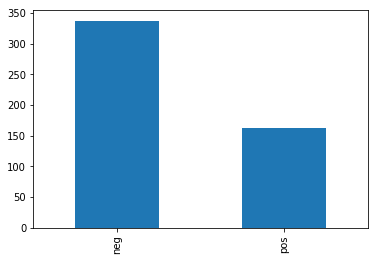

In [34]:
df['score comparision'].value_counts().plot(kind = 'bar')

From here we can see, only 150 of 500 sample in dataset1 passed the average median GRE score for Dataset2

In [35]:
df7 = df2.drop(["Number Of Reportees","GRE Quant (50th Percentile)","Number Of Acceptances And Rejections Reported","Number Reporting GRE and GPA","Undergraduate GPA (25 percentile)","Undergraduate GPA (75 percentile)","GRE Verbal (25th Percentile)","GRE Verbal (75th Percentile)","GRE Quant (25th Percentile)","GRE Quant (75th Percentile)","GRE Verbal (50th Percentile)"],axis=1)

In [36]:
df7

University Name  Acceptance Rate  \
0                                Stanford University         0.240785   
1           University Of California, Berkeley (UCB)         0.274848   
2                                Columbia University         0.292857   
3          University Of Michigan, Ann Arbor (UMich)         0.353737   
4                                 Cornell University         0.332619   
5       University Of California, Los Angeles (UCLA)         0.428707   
6                   University Of Chicago (UChicago)         0.306456   
7                 University Of Pennsylvania (UPenn)         0.278076   
8             University Of Washington, Seattle (UW)         0.372514   
9                                 Harvard University         0.285070   
10                                   Yale University         0.246557   
11                           Northwestern University         0.298255   
12                              Princeton University         0.251865   
13                  University Of Wisconsin, Madison         0.474844   
14       Massachusetts Institute Of Technology (MIT)         0.267641   
15        University Of California, San Diego (UCSD)         0.384114   
16           University Of Texas, Austin (UT Austin)         0.457064   
17                            Boston University (BU)         0.431001   
18   University Of Illinois, Urbana-Champaign (UIUC)         0.491480   
19                         New York University (NYU)         0.306589   
20        University Of Maryland, College Park (UMD)         0.479638   
21                                   Duke University         0.273983   
22   University Of North Carolina, Chapel Hill (UNC)         0.418576   
23                                  Brown University         0.234422   
24                  Carnegie Mellon University (CMU)         0.322864   
25        University Of Minnesota, Twin Cities (UMN)         0.484889   
26           University Of Southern California (USC)         0.463608   
27    University Of California, Santa Barbara (UCSB)         0.434294   
28                      University Of Virginia (UVA)         0.427647   
29                    Johns Hopkins University (JHU)         0.365418   
..                                               ...              ...   
99             Ohio State University, Columbus (OSU)         0.651877   
100                 University Of Missouri, Columbia         0.635246   
101                  Colorado State University (CSU)         0.542308   
102                               Clemson University         0.691756   
103                         University Of Cincinnati         0.569444   
104               University Of Tennessee, Knoxville         0.720930   
105                Washington State University (WSU)         0.706140   
106                                  SUNY Binghamton         0.759336   
107                           University Of Missouri         0.532995   
108                                Tulane University         0.529954   
109                         University Of New Mexico         0.686747   
110                                Lehigh University         0.609524   
111                              American University         0.592593   
112                           University Of Waterloo         0.490826   
113                       Baylor College Of Medicine         0.524823   
114                                Baylor University         0.488189   
115                      Texas A&M University (TAMU)         0.668394   
116                           Wayne State University         0.617978   
117  University Of Maryland, Baltimore County (UMBC)         0.684211   
118                           University Of Oklahoma         0.783133   
119                                Auburn University         0.650000   
120                         West Virginia University         0.696721   
121                        Oklahoma State University         0.597015   
122                   

here is some cleaning to take out the useful parameter

In [37]:
list = []
for i in range (0,500):
    list.append(9.35)

In [38]:
df["Undergraduate GPA 50 percentile)"] = list

In [39]:
df.head(5)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   Median Gre Score for 140 Univeristies  difference  \
0              0.92                                    323          14   
1              0.76                                    323           1   
2              0.72                                    323          -7   
3              0.80                                    323          -1   
4              0.65                                    323          -9   

  score comparision  Undergraduate GPA 50 percentile)  
0               pos                              9.35  
1               pos                              9.35  
2               neg                              9.35  
3               neg                              9.35  
4               neg                              9.35

Here I merged two dataset together, since the dataset1 is individual information and dataset2 is a average number for a group of individuals, so I take the average of the median for GRE score for 138 univeristies and compared the individual in dataset1 with the average median.

In [40]:
df["difference"] = df['CGPA'] - df['Undergraduate GPA 50 percentile)']

In [41]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   Median Gre Score for 140 Univeristies  difference  \
0              0.92                                    323        0.30   
1              0.76                                    323       -0.48   
2              0.72                                    323       -1.35   
3              0.80                                    323       -0.68   
4              0.65                                    323       -1.14   

  score comparision  Undergraduate GPA 50 percentile)  
0               pos                              9.35  
1               pos                              9.35  
2               neg                              9.35  
3               neg                              9.35  
4               neg                              9.35

Here is a similiar merge which I took out the median GPA, and compared individual performance with average median of 138 univeristies. 

In [42]:
list2 = []
for i in range (0,500):
    if (df.iloc[i,9]) >= 0:
        list2.append("pos")
    else:
        list2.append("neg")

df["score comparision"] = list2

In [43]:
df.head(5)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   Median Gre Score for 140 Univeristies  difference  \
0              0.92                                    323        0.30   
1              0.76                                    323       -0.48   
2              0.72                                    323       -1.35   
3              0.80                                    323       -0.68   
4              0.65                                    323       -1.14   

  score comparision  Undergraduate GPA 50 percentile)  
0               pos                              9.35  
1               neg                              9.35  
2               neg                              9.35  
3               neg                              9.35  
4               neg                              9.35

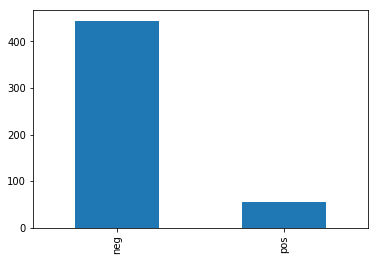

In [44]:
df['score comparision'].value_counts().plot(kind = 'bar')